In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

In [5]:
cleanmeta = pd.read_csv("actormetaMonths.csv")
cleanmeta = cleanmeta[['budget','revenue','popularity','runtime','castRevBudRatio','january','february','march','april','may','june','july','august','september','october','november','december']]
cleanmeta = cleanmeta.dropna()
cleanmeta = cleanmeta.reset_index()
X = cleanmeta[['budget','popularity','runtime','castRevBudRatio','january','february','march','april','may','june','july','august','september','october','november','december']].values
y = cleanmeta['revenue']/cleanmeta['budget'].values

In [6]:
X_train = X[:4500]
X_test = X[4500:]

y_train = y[:4500]
y_test = y[4500:]

In [7]:
#2 is near median of y
for i in range(0,len(y)):
    if y[i] > 2:
        y[i] = 1 #success
    else:
        y[i] = 0 #failure

In [8]:
"""
n_estimators
The number of trees in the forest.
"""

'\nn_estimators\nThe number of trees in the forest.\n'

In [9]:
rf_100 = RandomForestClassifier(n_estimators=100)#, max_depth=2, random_state=0)
rf_100.fit(X_train, y_train)
y_pred_100 = rf_100.predict(X_test)
scores_100 = cross_val_score(rf_100, X_test, y_test, cv=10).mean()
p_100 = cross_val_score(rf_100 , X_test, y_test, cv=10, scoring='precision').mean()
r_100 = cross_val_score(rf_100 , X_test, y_test, cv=10, scoring='recall').mean()
f1_100 = cross_val_score(rf_100 , X_test, y_test, cv=10, scoring='f1').mean()

In [10]:
rf_200 = RandomForestClassifier(n_estimators=200)
rf_200.fit(X_train, y_train)
y_pred_200 = rf_200.predict(X_test)
scores_200 = cross_val_score(rf_200, X_test, y_test, cv=10).mean()
p_200 = cross_val_score(rf_200 , X_test, y_test, cv=10, scoring='precision').mean()
r_200 = cross_val_score(rf_200 , X_test, y_test, cv=10, scoring='recall').mean()
f1_200 = cross_val_score(rf_200 , X_test, y_test, cv=10, scoring='f1').mean()

In [11]:
rf_300 = RandomForestClassifier(n_estimators=300)
rf_300.fit(X_train, y_train)
y_pred_300 = rf_300.predict(X_test)
scores_300 = cross_val_score(rf_300, X_test, y_test, cv=10).mean()
p_300  = cross_val_score(rf_300  , X_test, y_test, cv=10, scoring='precision').mean()
r_300  = cross_val_score(rf_300  , X_test, y_test, cv=10, scoring='recall').mean()
f1_300  = cross_val_score(rf_300  , X_test, y_test, cv=10, scoring='f1').mean()

In [12]:
rf_400 = RandomForestClassifier(n_estimators=400)
rf_400.fit(X_train, y_train)
y_pred_400 = rf_400.predict(X_test)
scores_400 = cross_val_score(rf_400, X_test, y_test, cv=10).mean()
p_400 = cross_val_score(rf_400 , X_test, y_test, cv=10, scoring='precision').mean()
r_400 = cross_val_score(rf_400 , X_test, y_test, cv=10, scoring='recall').mean()
f1_400 = cross_val_score(rf_400 , X_test, y_test, cv=10, scoring='f1').mean()

In [13]:
rf_500 = RandomForestClassifier(n_estimators=400)
rf_500.fit(X_train, y_train)
y_pred_500 = rf_500.predict(X_test)
scores_500 = cross_val_score(rf_500, X_test, y_test, cv=10).mean()
p_500 = cross_val_score(rf_500 , X_test, y_test, cv=10, scoring='precision').mean()
r_500 = cross_val_score(rf_500 , X_test, y_test, cv=10, scoring='recall').mean()
f1_500 = cross_val_score(rf_500 , X_test, y_test, cv=10, scoring='f1').mean()

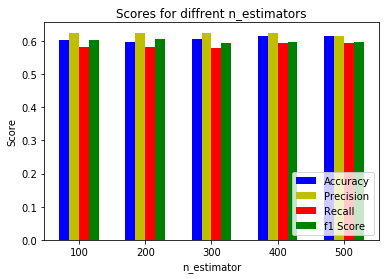

In [14]:
N = 5

ind = np.arange(N)
width = 0.15
fig, ax = plt.subplots()

accu = [scores_100,scores_200,scores_300,scores_400,scores_500]
rects1 = ax.bar(ind, accu, width, color='b')
prec = [p_100,p_200,p_300,p_400,p_500]
rects2 = ax.bar(ind+width, prec, width, color='y')
rec = [r_100,r_200,r_300,r_400,r_500]
rects3 = ax.bar(ind + 2 * width, rec, width, color='r')
f1score = [f1_100,f1_200,f1_300,f1_400,f1_500]
rects4 = ax.bar(ind+ 3 * width, f1score,  width, color='g')

ax.set_ylabel('Score')
ax.set_xlabel('n_estimator')
ax.set_title('Scores for diffrent n_estimators')
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(('100', '200','300','400','500'))
ax.legend((rects1[0], rects2[0], rects3[0],rects4[0]), ('Accuracy', 'Precision', 'Recall','f1 Score'),loc=4)
plt.show()

In [15]:
accu

[0.6027495509140219,
 0.59705379052047,
 0.605073937750226,
 0.6141909701431205,
 0.6141140678383995]

n_estimators=400 performs better than other parameter average

In [16]:
"""
Max features
"""

'\nMax features\n'

In [17]:
rf = RandomForestClassifier(n_estimators=400)# default auto, sqrt
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
scores = cross_val_score(rf, X_test, y_test, cv=10).mean()
p = cross_val_score(rf , X_test, y_test, cv=10, scoring='precision').mean()
r = cross_val_score(rf , X_test, y_test, cv=10, scoring='recall').mean()
f1 = cross_val_score(rf , X_test, y_test, cv=10, scoring='f1').mean()

In [18]:
rf_log2 = RandomForestClassifier(n_estimators=400, max_features = 'log2')
rf_log2.fit(X_train, y_train)
y_pred_log2 = rf_log2.predict(X_test)
scores_log2 = cross_val_score(rf_log2, X_test, y_test, cv=10).mean()
p_log2 = cross_val_score(rf_log2 , X_test, y_test, cv=10, scoring='precision').mean()
r_log2 = cross_val_score(rf_log2 , X_test, y_test, cv=10, scoring='recall').mean()
f1_log2 = cross_val_score(rf_log2 , X_test, y_test, cv=10, scoring='f1').mean()

In [19]:
rf_none = RandomForestClassifier(n_estimators=400, max_features = None)
rf_none.fit(X_train, y_train)
y_pred_none = rf_none.predict(X_test)
scores_none = cross_val_score(rf_none, X_test, y_test, cv=10).mean()
p_none = cross_val_score(rf_none , X_test, y_test, cv=10, scoring='precision').mean()
r_none = cross_val_score(rf_none , X_test, y_test, cv=10, scoring='recall').mean()
f1_none = cross_val_score(rf_none , X_test, y_test, cv=10, scoring='f1').mean()

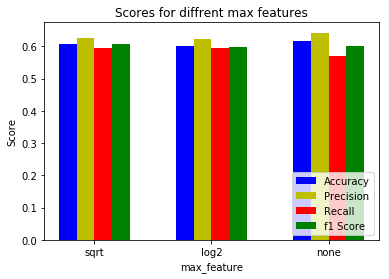

In [20]:
N = 3

ind = np.arange(N)
width = 0.15
fig, ax = plt.subplots()

accu = [scores,scores_log2,scores_none]
rects1 = ax.bar(ind, accu, width, color='b')
prec = [p,p_log2,p_none]
rects2 = ax.bar(ind+width, prec, width, color='y')
rec = [r,r_log2,r_none]
rects3 = ax.bar(ind + 2 * width, rec, width, color='r')
f1score = [f1,f1_log2,f1_none]
rects4 = ax.bar(ind+ 3 * width, f1score,  width, color='g')

ax.set_ylabel('Score')
ax.set_xlabel('max_feature')
ax.set_title('Scores for diffrent max features')
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(('sqrt','log2','none'))
ax.legend((rects1[0], rects2[0], rects3[0],rects4[0]), ('Accuracy', 'Precision', 'Recall','f1 Score'),loc=4)

plt.show()

In [21]:
accu

[0.6085349817430407, 0.6016900895823794, 0.6174848543552536]

Max feature = none outperform others by about 1%   

In [22]:
rf = RandomForestClassifier(n_estimators=400,max_features = None)# default auto, sqrt
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
scores = cross_val_score(rf, X_test, y_test, cv=10).mean()
p = cross_val_score(rf , X_test, y_test, cv=10, scoring='precision').mean()
r = cross_val_score(rf , X_test, y_test, cv=10, scoring='recall').mean()
f1 = cross_val_score(rf , X_test, y_test, cv=10, scoring='f1').mean()

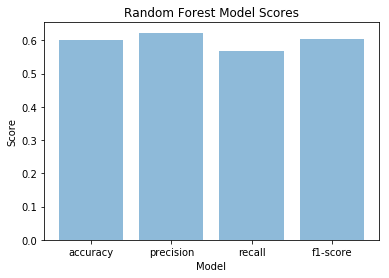

In [23]:
objects = scores,p,r,f1
y_pos = np.arange(len(objects))
 
plt.bar(y_pos, objects, align='center', alpha=0.5)
plt.xticks([0, 1, 2, 3], ["accuracy", "precision", "recall", "f1-score"])
plt.ylabel('Score')
plt.xlabel('Model')
plt.title('Random Forest Model Scores')
 
plt.show()

In [27]:
objects

(0.6004512873798035,
 0.6227619787960517,
 0.5687632135306554,
 0.6040238882890906)

Feature ranking:
1. feature 1 (0.275629)
2. feature 3 (0.237038)
3. feature 0 (0.186930)
4. feature 2 (0.152157)
5. feature 12 (0.015427)
6. feature 15 (0.013373)
7. feature 9 (0.012980)
8. feature 8 (0.012725)
9. feature 10 (0.012513)
10. feature 5 (0.012396)
11. feature 7 (0.012287)
12. feature 11 (0.011919)
13. feature 13 (0.011901)
14. feature 6 (0.011550)
15. feature 4 (0.011094)
16. feature 14 (0.010081)


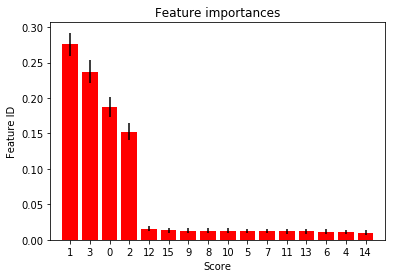

In [24]:
# Build a forest and compute the feature importances

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.xlabel('Score')
plt.ylabel("Feature ID")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

'budget','popularity','runtime','castRevBudRatio','january','february','march','april','may','june','july','august','september','october','november','december'

In [25]:
12

12